## Analysis on models runtime
⚠️ This notebook aims to analyze the runtimes obtained from the experiment conducted in `synthetic_experiments.ipynb`.

### ⚙️ Environment settings

In [22]:
"""
    Importing needed libs
"""

'\n    Importing needed libs\n'

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 🖥️ Data loading

In [24]:
df = pd.read_csv('../outputs/synt_tracking.csv')
display(df)

,community_detector,used_communities,community,algorithm_rec,test_size,split_id,train_runtime,test_runtime
0,Not-Applicable,NaN,NaN,NormalPredictor,0.25,1,0.005000,0.011000
1,Not-Applicable,NaN,NaN,SVD,0.25,1,0.055901,0.007620
2,Not-Applicable,NaN,NaN,k-NN,0.25,1,0.004000,0.062643
3,Not-Applicable,NaN,NaN,NMF,0.25,1,0.041906,0.007000
4,Not-Applicable,NaN,NaN,Co-Clustering,0.25,1,0.077470,0.004781
...,...,...,...,...,...,...,...,...
18727,Paris,20.0,6.0,SlopeOne,0.01,5,0.001000,0.000000
18728,Paris,20.0,3.0,SlopeOne,0.01,5,0.000000,0.001000
18729,Paris,20.0,2.0,SlopeOne,0.01,5,0.001000,0.000000
18730,Paris,20.0,1.0,SlopeOne,0.01,5,0.000000,0.000000


In [25]:
mapmin = pd.read_csv('../outputs/synt_best_n.csv')
display(mapmin)

,detector,size,algorec,best_n
0,Louvain,0.25,Co-Clustering,2.0
1,Louvain,0.25,NMF,2.0
2,Louvain,0.25,NormalPredictor,1.0
3,Louvain,0.25,SVD,3.0
4,Louvain,0.25,SlopeOne,2.0
5,Louvain,0.25,k-NN,2.0
6,Louvain,0.10,Co-Clustering,2.0
7,Louvain,0.10,NMF,2.0
8,Louvain,0.10,NormalPredictor,1.0
9,Louvain,0.10,SVD,2.0


### 📈 Analysis

In [26]:
test_sizes = list(
    set(
        df['test_size']
        )
    )
test_sizes.sort(reverse=True) 

community_detectors = list(
    set(
        df['community_detector']
        )
    )
community_detectors.sort()

algos = list(
    set(
        df['algorithm_rec']
        )
    )
algos.sort()

In [27]:
mapmin

,detector,size,algorec,best_n
0,Louvain,0.25,Co-Clustering,2.0
1,Louvain,0.25,NMF,2.0
2,Louvain,0.25,NormalPredictor,1.0
3,Louvain,0.25,SVD,3.0
4,Louvain,0.25,SlopeOne,2.0
5,Louvain,0.25,k-NN,2.0
6,Louvain,0.10,Co-Clustering,2.0
7,Louvain,0.10,NMF,2.0
8,Louvain,0.10,NormalPredictor,1.0
9,Louvain,0.10,SVD,2.0


In [29]:
runtime

,algorithm_rec,community_detector,train_runtime,test_runtime
0,Co-Clustering,Not-Applicable,0.084981,0.000000
7,Co-Clustering,Paris,0.197022,0.001000
6,Co-Clustering,Louvain,0.085132,0.000000
9,NMF,Paris,0.134319,0.002003
8,NMF,Louvain,0.052705,0.000000
1,NMF,Not-Applicable,0.066035,0.000000
2,NormalPredictor,Not-Applicable,0.006943,0.000000
10,NormalPredictor,Louvain,0.006609,0.000000
11,NormalPredictor,Paris,0.010139,0.001001
3,SVD,Not-Applicable,0.046651,0.001001


C:\Users\rdutr\AppData\Local\Temp\ipykernel_64288\817108069.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  noc = noc.groupby(['algorithm_rec', 'community_detector'])['train_runtime', 'test_runtime'].median().reset_index()
C:\Users\rdutr\AppData\Local\Temp\ipykernel_64288\817108069.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wco = wco.groupby(['algorithm_rec', 'community_detector', 'used_communities', 'community'])['train_runtime', 'test_runtime'].median().reset_index()
C:\Users\rdutr\AppData\Local\Temp\ipykernel_64288\817108069.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wco = wco.groupby(['algorithm_rec', 'community_detector'])['train_runtime', 'test_runtime'].sum().reset_index()


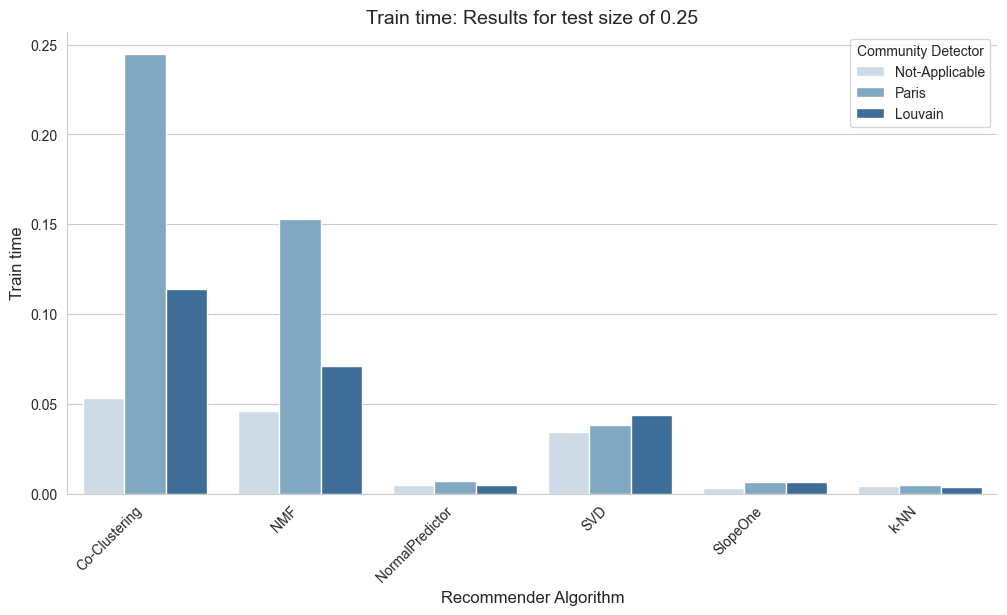

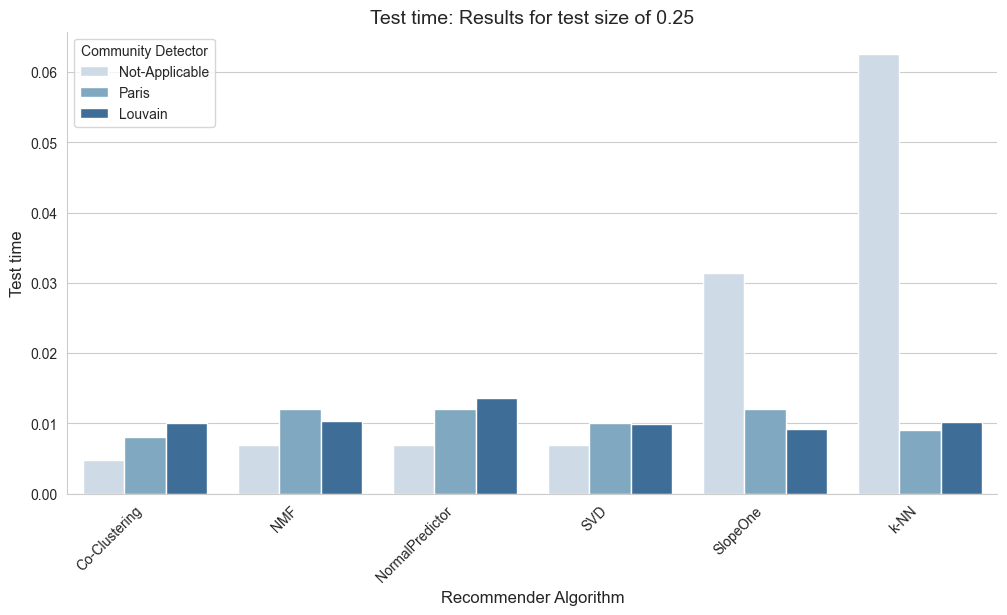

Co-Clustering / Not-Applicable / RMSE: 0.0530745983123779 / 0.0047807693481445
NMF / Not-Applicable / RMSE: 0.046274185180664 / 0.0069997310638427
NormalPredictor / Not-Applicable / RMSE: 0.0049996376037597 / 0.0070006847381591
SVD / Not-Applicable / RMSE: 0.0341007709503173 / 0.0069990158081054
SlopeOne / Not-Applicable / RMSE: 0.0029993057250976 / 0.0313689708709716
k-NN / Not-Applicable / RMSE: 0.004000186920166 / 0.0626428127288818
Co-Clustering / Louvain / RMSE: 0.11412107944488512 / 0.01000130176544165
Co-Clustering / Paris / RMSE: 0.2448985576629623 / 0.007999181747436301
NMF / Louvain / RMSE: 0.0708068609237668 / 0.0103731155395506
NMF / Paris / RMSE: 0.1530725955963119 / 0.012066125869750699
NormalPredictor / Louvain / RMSE: 0.005002737045287999 / 0.013689041137695201
NormalPredictor / Paris / RMSE: 0.0070095062255857 / 0.0119986534118651
SVD / Louvain / RMSE: 0.0439898967742917 / 0.0099043846130368
SVD / Paris / RMSE: 0.038093566894530397 / 0.0100021362304684
SlopeOne / Louva

C:\Users\rdutr\AppData\Local\Temp\ipykernel_64288\817108069.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  noc = noc.groupby(['algorithm_rec', 'community_detector'])['train_runtime', 'test_runtime'].median().reset_index()
C:\Users\rdutr\AppData\Local\Temp\ipykernel_64288\817108069.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wco = wco.groupby(['algorithm_rec', 'community_detector', 'used_communities', 'community'])['train_runtime', 'test_runtime'].median().reset_index()
C:\Users\rdutr\AppData\Local\Temp\ipykernel_64288\817108069.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wco = wco.groupby(['algorithm_rec', 'community_detector'])['train_runtime', 'test_runtime'].sum().reset_index()


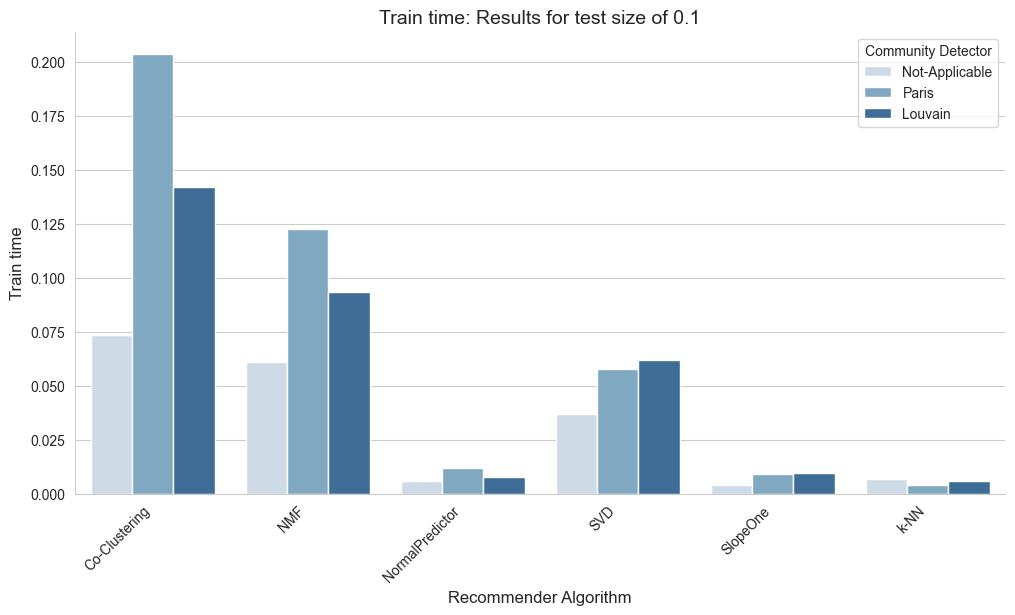

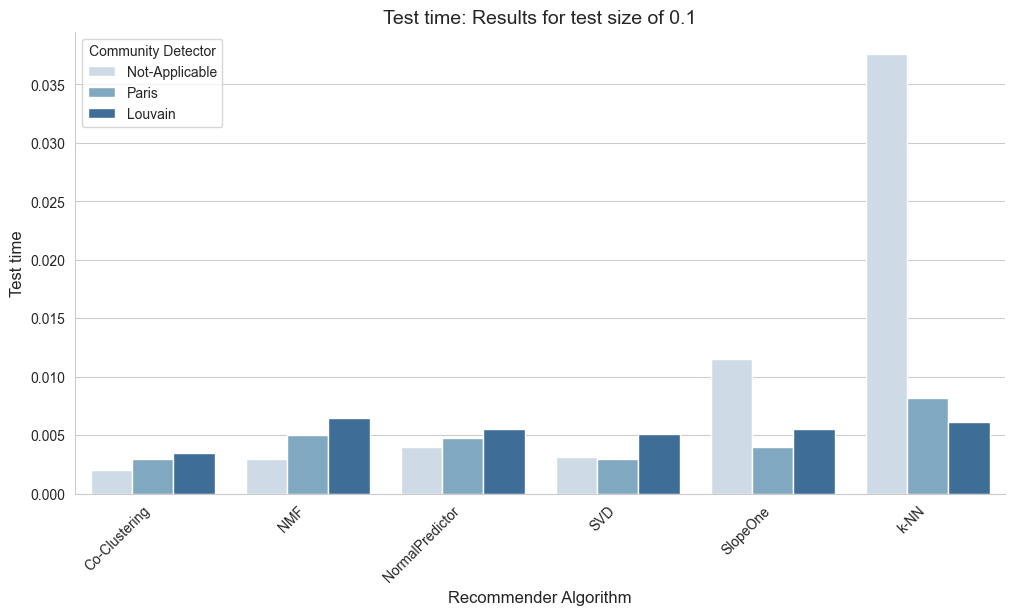

Co-Clustering / Not-Applicable / RMSE: 0.0736207962036132 / 0.0019996166229248
NMF / Not-Applicable / RMSE: 0.0609776973724365 / 0.0030000209808349
NormalPredictor / Not-Applicable / RMSE: 0.0060040950775146 / 0.0039989948272705
SVD / Not-Applicable / RMSE: 0.0366771221160888 / 0.003145694732666
SlopeOne / Not-Applicable / RMSE: 0.0040006637573242 / 0.0115385055541992
k-NN / Not-Applicable / RMSE: 0.0068006515502929 / 0.037630558013916
Co-Clustering / Louvain / RMSE: 0.1418257951736448 / 0.00350046157836895
Co-Clustering / Paris / RMSE: 0.2036795616149891 / 0.0029993057250976
NMF / Louvain / RMSE: 0.0934391021728512 / 0.0065023899078367
NMF / Paris / RMSE: 0.1223266124725334 / 0.0050184726715086
NormalPredictor / Louvain / RMSE: 0.0075575113296507 / 0.00549960136413555
NormalPredictor / Paris / RMSE: 0.0120708942413324 / 0.004802227020263526
SVD / Louvain / RMSE: 0.06178259849548315 / 0.00509226322174045
SVD / Paris / RMSE: 0.057672023773192596 / 0.0029995441436766997
SlopeOne / Louvai

C:\Users\rdutr\AppData\Local\Temp\ipykernel_64288\817108069.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  noc = noc.groupby(['algorithm_rec', 'community_detector'])['train_runtime', 'test_runtime'].median().reset_index()
C:\Users\rdutr\AppData\Local\Temp\ipykernel_64288\817108069.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wco = wco.groupby(['algorithm_rec', 'community_detector', 'used_communities', 'community'])['train_runtime', 'test_runtime'].median().reset_index()
C:\Users\rdutr\AppData\Local\Temp\ipykernel_64288\817108069.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wco = wco.groupby(['algorithm_rec', 'community_detector'])['train_runtime', 'test_runtime'].sum().reset_index()


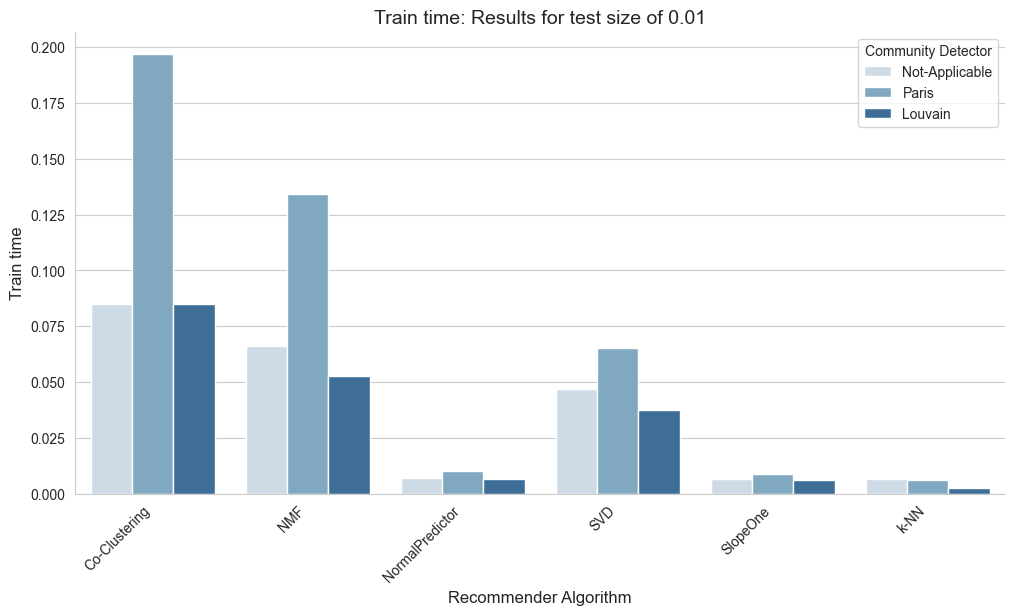

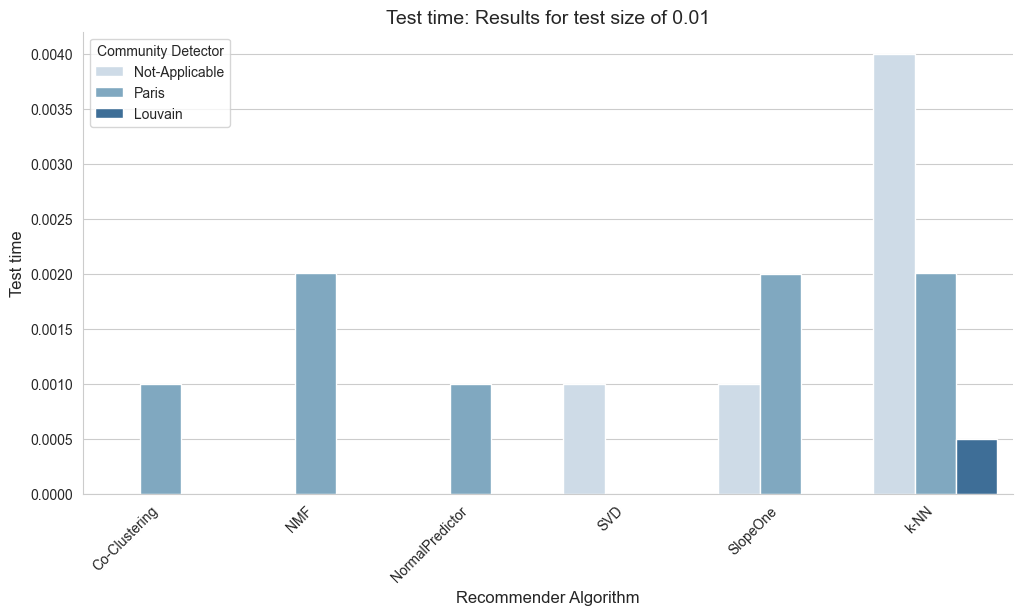

Co-Clustering / Not-Applicable / RMSE: 0.0849812030792236 / 0.0
NMF / Not-Applicable / RMSE: 0.0660347938537597 / 0.0
NormalPredictor / Not-Applicable / RMSE: 0.0069432258605957 / 0.0
SVD / Not-Applicable / RMSE: 0.0466511249542236 / 0.0010013580322265
SlopeOne / Not-Applicable / RMSE: 0.0063686370849609 / 0.0009999275207519
k-NN / Not-Applicable / RMSE: 0.0066657066345214 / 0.0040004253387451
Co-Clustering / Louvain / RMSE: 0.0851317644119261 / 0.0
Co-Clustering / Paris / RMSE: 0.19702172279357788 / 0.0010004043579101
NMF / Louvain / RMSE: 0.0527048110961912 / 0.0
NMF / Paris / RMSE: 0.13431906700134172 / 0.0020031929016111998
NormalPredictor / Louvain / RMSE: 0.0066094398498533005 / 0.0
NormalPredictor / Paris / RMSE: 0.010139226913451701 / 0.0010006427764892
SVD / Louvain / RMSE: 0.037457227706909 / 0.0
SVD / Paris / RMSE: 0.0654392242431633 / 0.0
SlopeOne / Louvain / RMSE: 0.0060068368911740996 / 0.0
SlopeOne / Paris / RMSE: 0.0090205669403072 / 0.0019998550415038
k-NN / Louvain / 

In [31]:
for test_size in test_sizes:
    mapt = mapmin[mapmin['size'] == test_size][['detector', 'algorec', 'best_n']]
    data = df[df['test_size'] == test_size]
    
    noc = data[data['community_detector'] == 'Not-Applicable']
    noc = noc.groupby(['algorithm_rec', 'community_detector'])['train_runtime', 'test_runtime'].median().reset_index()
    
    wco = data[data['community_detector'] != 'Not-Applicable']
    wco = wco.groupby(['algorithm_rec', 'community_detector', 'used_communities', 'community'])['train_runtime', 'test_runtime'].median().reset_index()
    wco['best_n'] = wco.set_index(['algorithm_rec', 'community_detector']).index.map(mapt.set_index(['algorec', 'detector'])['best_n'])
    wco = wco.drop(wco[wco['used_communities'] != wco['best_n']].index)
    wco.drop(['best_n', 'used_communities'], axis=1, inplace=True)
    wco = wco.groupby(['algorithm_rec', 'community_detector'])['train_runtime', 'test_runtime'].sum().reset_index()
    
    runtime = pd.concat([noc, wco], ignore_index=True)
    runtime = runtime.sort_values(by='algorithm_rec')
    colors = sns.color_palette('Blues', n_colors=len(runtime['community_detector'].unique()), desat=0.8)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='algorithm_rec', y='train_runtime', hue='community_detector', data=runtime, palette=colors)
    plt.xlabel('Recommender Algorithm', fontsize=12)
    plt.ylabel('Train time', fontsize=12)
    plt.title(f'Train time: Results for test size of {test_size}', fontsize=14)
    plt.legend(title='Community Detector', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    sns.despine()
    sns.set_style("whitegrid")
    #plt.savefig(f'../plots/runtimes/synthetic_data/traintime_{test_size}.png')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='algorithm_rec', y='test_runtime', hue='community_detector', data=runtime, palette=colors)
    plt.xlabel('Recommender Algorithm', fontsize=12)
    plt.ylabel('Test time', fontsize=12)
    plt.title(f'Test time: Results for test size of {test_size}', fontsize=14)
    plt.legend(title='Community Detector', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    sns.despine()
    sns.set_style("whitegrid")
    #plt.savefig(f'../plots/runtimes/synthetic_data/testtime_{test_size}.png')
    plt.show()
    
    for i in range(len(runtime)):
        print(f'{runtime["algorithm_rec"][i]} / {runtime["community_detector"][i]} / RMSE: {runtime["train_runtime"][i]} / {runtime["test_runtime"][i]}' )


In [27]:
wco

,algorithm_rec,community_detector,train_runtime,test_runtime
0,Co-Clustering,Louvain,0.103415,0.000000
1,Co-Clustering,Paris,0.129708,0.000000
2,NMF,Louvain,0.058599,0.000000
3,NMF,Paris,0.086521,0.001000
4,NormalPredictor,Louvain,0.009399,0.000000
5,NormalPredictor,Paris,0.007000,0.000000
6,SVD,Louvain,0.031300,0.000000
7,SVD,Paris,0.051014,0.000000
8,SlopeOne,Louvain,0.004060,0.000000
9,SlopeOne,Paris,0.005540,0.003670


In [29]:
noc

,algorithm_rec,community_detector,train_runtime,test_runtime
0,Co-Clustering,Not-Applicable,0.076959,0.000000
1,NMF,Not-Applicable,0.058028,0.000992
2,NormalPredictor,Not-Applicable,0.007000,0.000000
3,SVD,Not-Applicable,0.051627,0.001000
4,SlopeOne,Not-Applicable,0.004001,0.001000
5,k-NN,Not-Applicable,0.005998,0.004000


In [14]:
df

,community_detector,used_communities,community,algorithm_rec,test_size,split_id,train_runtime,test_runtime
0,Not-Applicable,NaN,NaN,NormalPredictor,0.01,1,0.007000,0.000000
1,Not-Applicable,NaN,NaN,SVD,0.01,1,0.055784,0.001001
2,Not-Applicable,NaN,NaN,k-NN,0.01,1,0.005997,0.003999
3,Not-Applicable,NaN,NaN,NMF,0.01,1,0.065173,0.000000
4,Not-Applicable,NaN,NaN,Co-Clustering,0.01,1,0.076959,0.000000
...,...,...,...,...,...,...,...,...
979,Paris,3.0,99.0,SlopeOne,0.01,5,0.004095,0.000998
980,Paris,4.0,3.0,SlopeOne,0.01,5,0.000000,0.001000
981,Paris,4.0,2.0,SlopeOne,0.01,5,0.001000,0.000999
982,Paris,4.0,1.0,SlopeOne,0.01,5,0.001000,0.000000
